In [1]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
from json import dump

In [2]:
ramp_1 = pd.read_csv("ramp_24_11.csv")
ramp_2 = pd.read_csv("ramp_24_11_2.csv")
ramp_3 = pd.read_csv("ramp_27_11.csv")

step_1 = pd.read_csv("step5v_24_11.csv").query("Velocidade > 0 and Velocidade < 4")
step_2 = pd.read_csv("step5v_27_11.csv").query("Velocidade > 0 and Velocidade < 4")
step_3 = pd.read_csv("step5v_27_11_2.csv").query("Velocidade > 0 and Velocidade < 4")
step_4 = pd.read_csv("step1v_24_11.csv").query("Velocidade > 0 and Velocidade < 4")
step_5 = pd.read_csv("step1v_24_11_2.csv").query("Velocidade > 0 and Velocidade < 4")

tau, ss_err = [], []

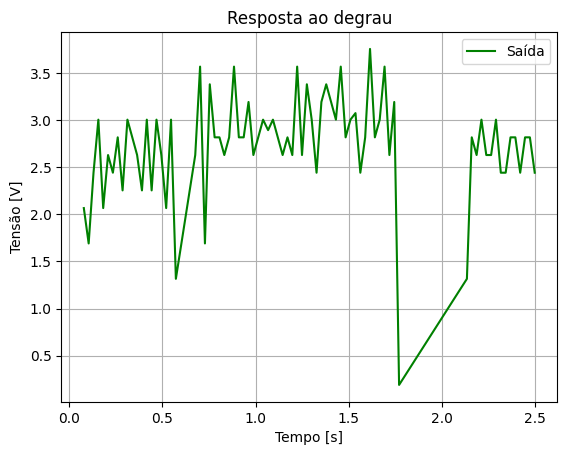

In [3]:
df = step_1.query("Tempo < 2.5")
plt.plot(df["Tempo"], df["Velocidade"], c="g", label="Saída")
plt.grid()
plt.title("Resposta ao degrau")
plt.ylabel("Tensão [V]")
plt.xlabel("Tempo [s]")
plt.legend()
plt.show()

In [4]:
ss_speed = df.query("Tempo >= 0.75 and Tempo <= 1.6").Velocidade.mean()
tau.append(df.loc[df["Velocidade"] >= 0.63*ss_speed].iloc[0, 0])

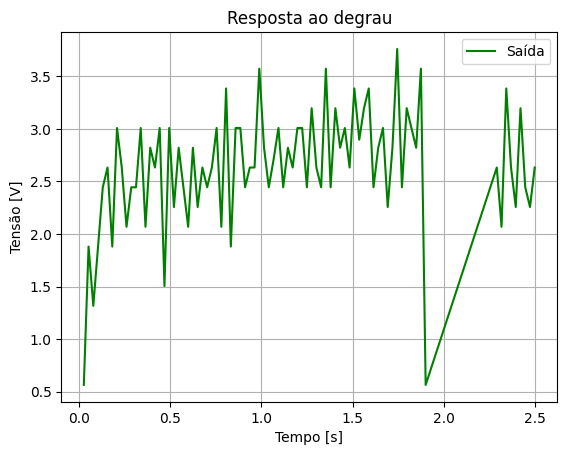

In [5]:
df = step_2.query("Tempo < 2.5")
plt.plot(df["Tempo"], df["Velocidade"], c="g", label="Saída")
plt.grid()
plt.title("Resposta ao degrau")
plt.ylabel("Tensão [V]")
plt.xlabel("Tempo [s]")
plt.legend()
plt.show()

In [6]:
ss_speed = df.query("Tempo >= 1 and Tempo <= 1.75").Velocidade.mean()
tau.append(df.loc[df["Velocidade"] >= 0.63*ss_speed].iloc[0, 0])

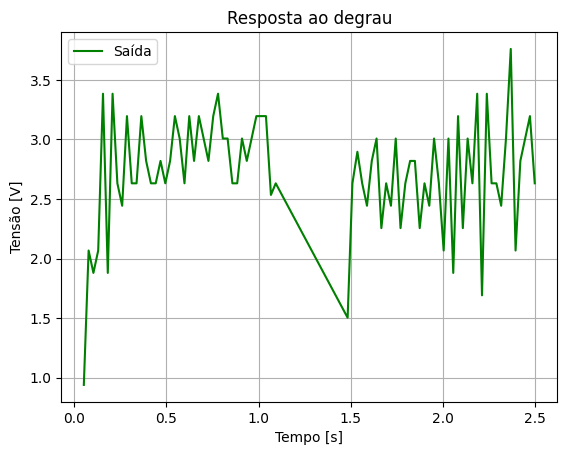

In [7]:
df = step_3.query("Tempo < 2.5")
plt.plot(df["Tempo"], df["Velocidade"], c="g", label="Saída")
plt.grid()
plt.title("Resposta ao degrau")
plt.ylabel("Tensão [V]")
plt.xlabel("Tempo [s]")
plt.legend()
plt.show()

In [8]:
ss_speed = df.query("Tempo >= 1.5 and Tempo <= 2.5").Velocidade.mean()
tau.append(df.loc[df["Velocidade"] >= 0.63*ss_speed].iloc[0, 0])

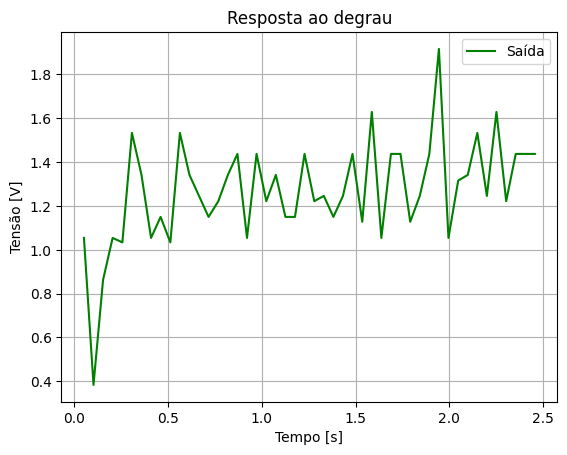

In [9]:
df = step_4.query("Tempo < 2.5")
plt.plot(df["Tempo"], df["Velocidade"], c="g", label="Saída")
plt.grid()
plt.title("Resposta ao degrau")
plt.ylabel("Tensão [V]")
plt.xlabel("Tempo [s]")
plt.legend()
plt.show()

In [10]:
ss_speed = df.query("Tempo >= 1").Velocidade.mean()
tau.append(df.loc[df["Velocidade"] >= 0.63*ss_speed].iloc[0, 0])

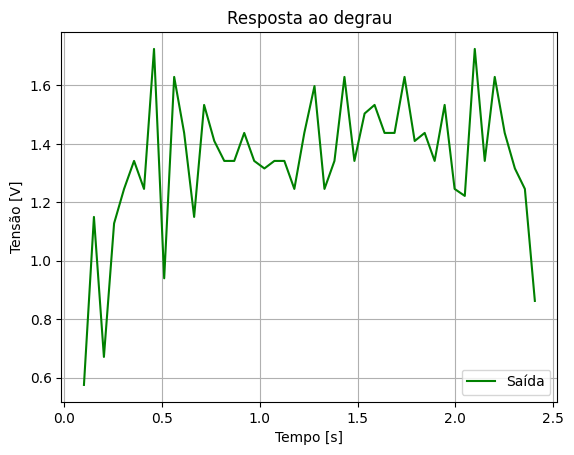

In [11]:
df = step_5.query("Tempo < 2.5")
plt.plot(df["Tempo"], df["Velocidade"], c="g", label="Saída")
plt.grid()
plt.title("Resposta ao degrau")
plt.ylabel("Tensão [V]")
plt.xlabel("Tempo [s]")
plt.legend()
plt.show()

In [12]:
ss_speed = df.query("Tempo >= 0.75 and Tempo <= 1.75").Velocidade.mean()
tau.append(df.loc[df["Velocidade"] >= 0.63*ss_speed].iloc[0, 0])

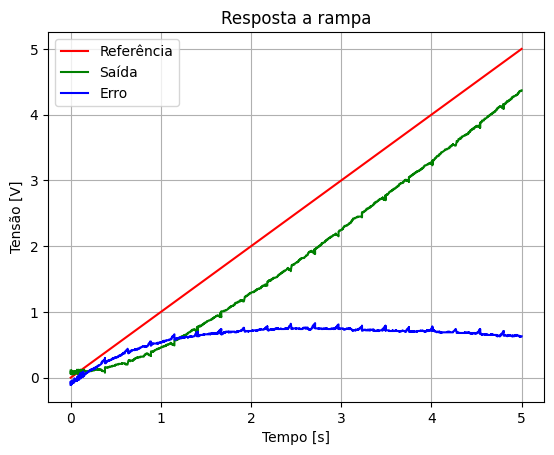

In [13]:
df = ramp_1.iloc[:2454]
plt.plot(df["Tempo"], df["Referencia"], c="r", label="Referência")
plt.plot(df["Tempo"], df["Posicao"], c="g", label="Saída")
plt.plot(df["Tempo"], df["Erro"], c="b", label="Erro")
plt.grid()
plt.title("Resposta a rampa")
plt.ylabel("Tensão [V]")
plt.xlabel("Tempo [s]")
plt.legend()
plt.show()

In [14]:
ss_err.append(df.query("Tempo >= 2").Erro.mean())

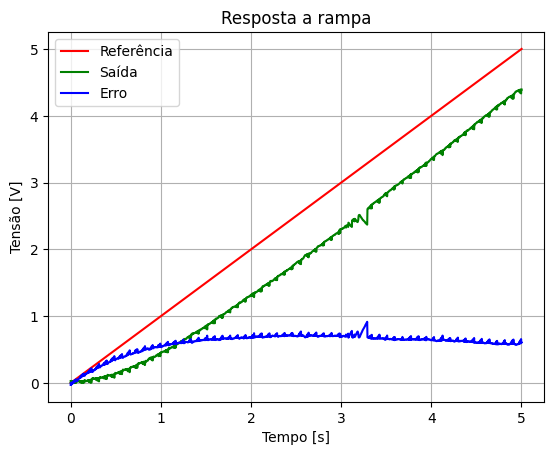

In [15]:
df = ramp_2.iloc[:1474]
plt.plot(df["Tempo"], df["Referencia"], c="r", label="Referência")
plt.plot(df["Tempo"], df["Posicao"], c="g", label="Saída")
plt.plot(df["Tempo"], df["Erro"], c="b", label="Erro")
plt.grid()
plt.title("Resposta a rampa")
plt.ylabel("Tensão [V]")
plt.xlabel("Tempo [s]")
plt.legend()
plt.show()

In [16]:
ss_err.append(df.query("Tempo >= 2").Erro.mean())

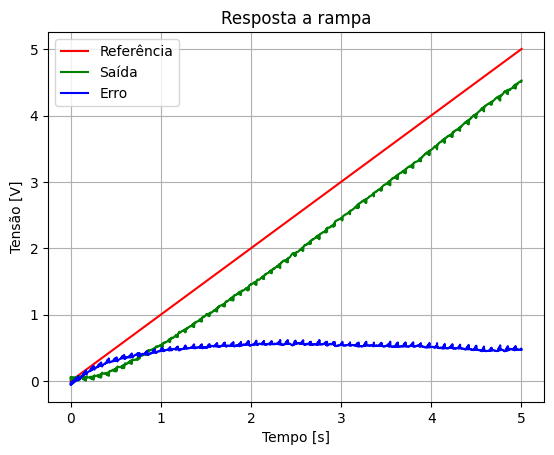

In [17]:
df = ramp_3.iloc[:1474]
plt.plot(df["Tempo"], df["Referencia"], c="r", label="Referência")
plt.plot(df["Tempo"], df["Posicao"], c="g", label="Saída")
plt.plot(df["Tempo"], df["Erro"], c="b", label="Erro")
plt.grid()
plt.title("Resposta a rampa")
plt.ylabel("Tensão [V]")
plt.xlabel("Tempo [s]")
plt.legend()
plt.show()

In [18]:
ss_err.append(df.query("Tempo >= 2").Erro.mean())

In [38]:
tau = np.array(tau)
ss_err = np.array(ss_err)
print(f"Constante de tempo: {tau.mean()}s")
print(f"Ganho de malha aberta: {1/ss_err.mean()}")

Constante de tempo: 0.0824s
Ganho de malha aberta: 1.5755022863155657


In [42]:
with open("system_parameters/motor_1.info", "w") as file:
    dump({
        "tau": tau.mean(),
        "K":1/ss_err.mean()
    }, file)

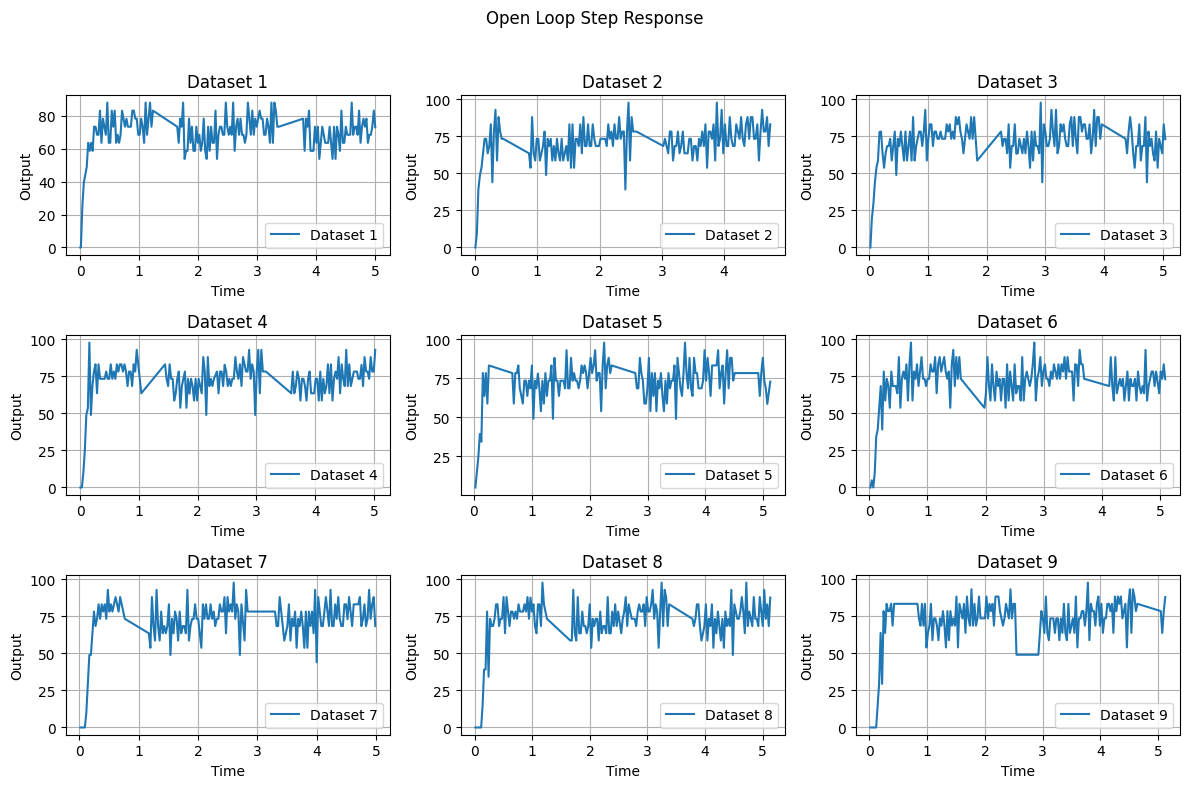

In [100]:
fig, axs = plt.subplots(3, 3, figsize=(12, 8))
fig.suptitle('Open Loop Step Response')

for i in range(1, 10):
    file_path = f'plot_data/data/11_12/step_open_loop_{i}.csv'
    df = pd.read_csv(file_path)

    row, col = divmod(i-1, 3)
    axs[row, col].plot(df['Time'], df['Output'], label=f'Dataset {i}')
    axs[row, col].set_title(f'Dataset {i}')
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Output')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()